In [58]:
# installing the modules needed
#! pip install pydataset
#! pip install matplotlib
#! pip install pandas
#! pip install seaborn

import seaborn as sns # from the name Samuel Norman Seaborn, a character in a tv show
from pydataset import data
import pandas as pd

# SEABORN

* Seaborn uses matplotlib in the background. So anything done with seaborn can be done with pyplot (pyplot is an interface to use matplotlib). But seaborn makes many plots faster to create, with less code, and also prettier. 


* Seaborn makes a lot of decisions, assumptions and calculations by default (like calculating the regression line for a scatter plot), and it can create subplots automatically for subsets of data (this is called faceting). It removes complexity, but also flexibility. Luckily, one can always modify the default settings of seaborn using pyplot commands.


* One caveat is that the structure of the code to build plots in seaborn is not as standardized as in pyplot. For example, the arguments of the various functions have different names in different plots, some accept col and row (for faceting), others don't, some return an ax object, others a more global object that contains figure and axes, some functions capitalize words, others don't (jointplot(), JointGrid()), many functions do almost the same thing with slight differences: lmplot = regplot + facetting, relplot = scatter + facetting, pairplot is a specific type of PairGrid. It looks like seaborn was created by many different people without a coordinator imposing a strict standardized approach.

* seaborn functions that return an ax object: sns.scatterplot(), sns.countplot(), sns.boxplot()...
* seaborn functions that return the whole facetgrid figure: sns.catplot(), sns.relplot()

In [64]:
my_object = sns.scatterplot()
plt.close() # here to prevent jupyter from showingthe empty plot
type(my_object)

matplotlib.axes._subplots.AxesSubplot

In [63]:
my_object = sns.relplot()
plt.close() # here to prevent jupyter from showingthe empty plot
type(my_object)

seaborn.axisgrid.FacetGrid

* categorical plots show the distribution of a quantitative variable within a subset of data defined by a categorical variable. Eg. sns.boxplot(), sns.barplot(), sns.countplot()

# HOW TO DISPLAY CATEGORICAL DATA

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


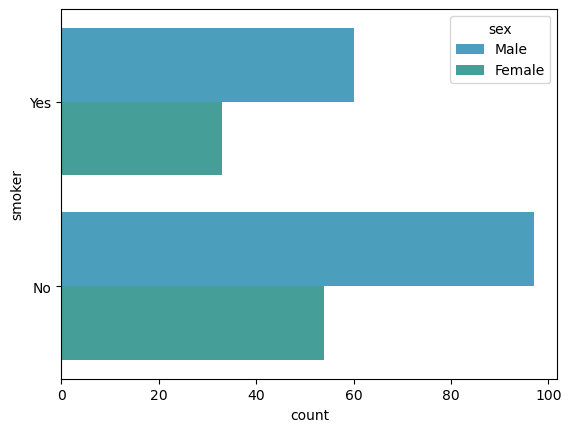

In [66]:
# In these plots you can set the palette directly in the plot function
tips = sns.load_dataset('tips')
print(tips.head())


# simple count: like value_counts but in a chart
sns.countplot(data=tips,y="smoker",hue="sex");


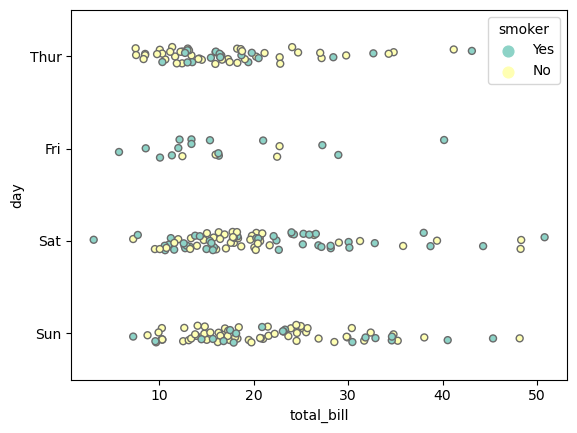

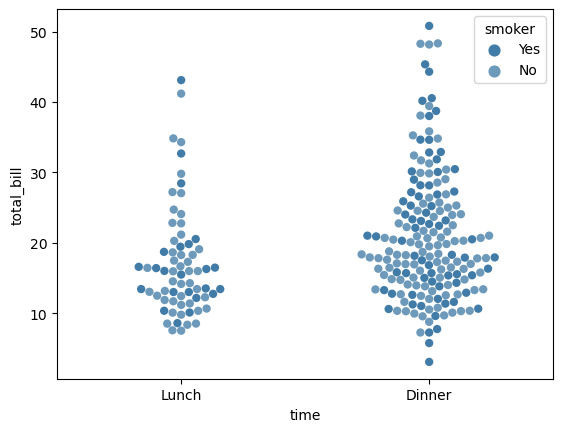

In [84]:
# when to use a stripplot, a box plot, violinplot etc?

sns.stripplot(x="total_bill", y="day", data=tips, hue="smoker", linewidth=1, palette="Set3", jitter =True)
# jitter adds spaces between the points for better readbility
plt.show()
sns.swarmplot(x="time", y="total_bill", data=tips, size=6, hue= 'smoker')
# no overlap at all!
plt.show()

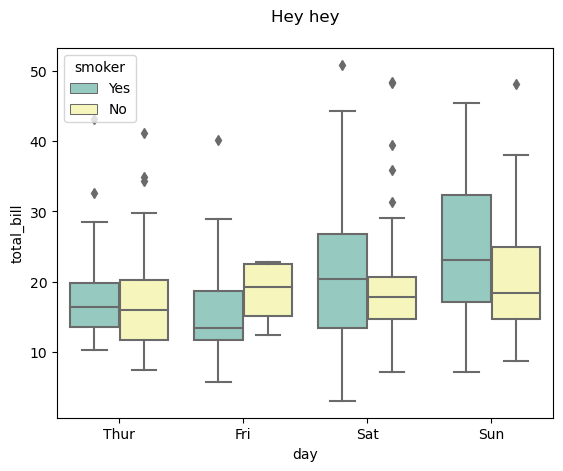

In [71]:
fig, axes = plt.subplots()
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3", ax = axes) 
axes.set_title("Hey hey", y=1.02) # y is here to set the height of the title vs the default (1)
plt.show()
# see how we assign the value of ax here? not inside the function

<AxesSubplot:xlabel='day', ylabel='tip'>

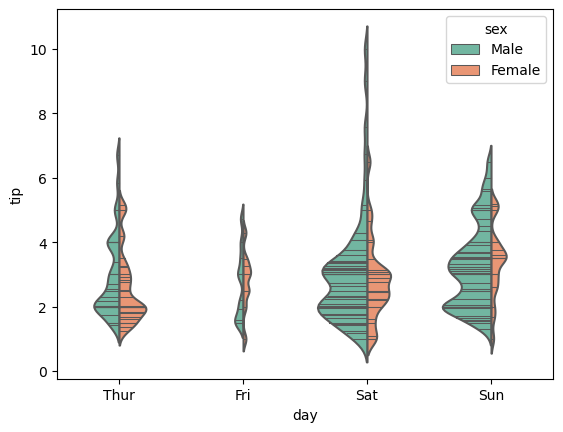

In [19]:
sns.violinplot(x="day", y="tip", hue="sex",data=tips, palette="Set2", split=True,
               scale="count", inner="stick",scale_hue=False, bw=.2)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


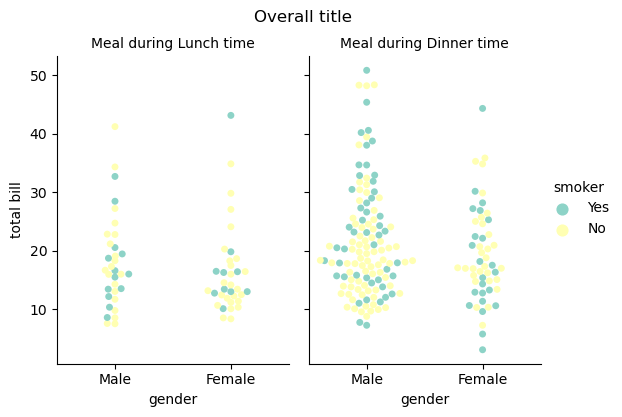

In [78]:

# Use catplot() to combine a 'swarm' or a 'strip' -plot and a FacetGrid (ie: one separate plot for each 
# of the values found in one column).
# A facet is a particular aspect of something. Here, by using col = 'time', we will inspect how 
# the data is different if we consider the type of mean (lunch or dinner) aspect of it. It is split in columns
# we could also split the data according to another variable using row = .
print(tips.head())
g = sns.catplot(x="sex", y="total_bill", hue="smoker", col="time",data=tips, kind="swarm", height=4, aspect=.7, palette="Set3")

# Add a title to the whole figure with a facetgrid object
g.fig.suptitle("Overall title",y=1.03); #the y parameter is here to set the height of the title compared to default (1)


# overwrite the ax titles instead of the default (column_name = value_of_this_subset)
g.set_titles("Meal during {col_name} time")


# change labels
g.set(xlabel="gender", ylabel="total bill")

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


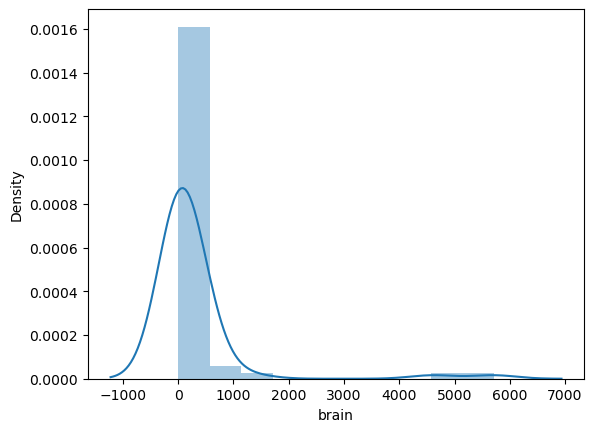

In [48]:
# plotting with seaborn
sns.distplot(mammals['brain'],kde=True,bins=10);
# the kde argument plts a density function over the data, labels are ploted by default

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='brain', ylabel='Density'>

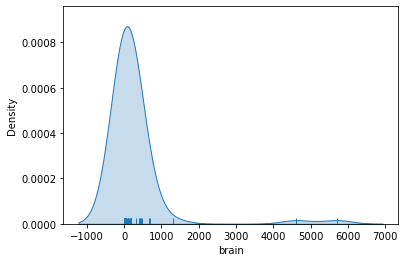

In [7]:
# now just the density plot with a rug to show where the datapoints are and a fill for the area 
# under the density curve
sns.distplot(mammals['brain'], hist=False,rug=True, kde_kws={'shade':True})

<AxesSubplot:xlabel='base', ylabel='seizure.rate'>

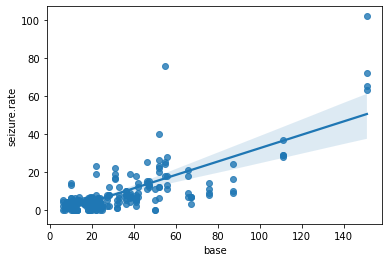

In [8]:
epilepsy = data('epilepsy')

sns.regplot(data=epilepsy,x='base',y='seizure.rate')

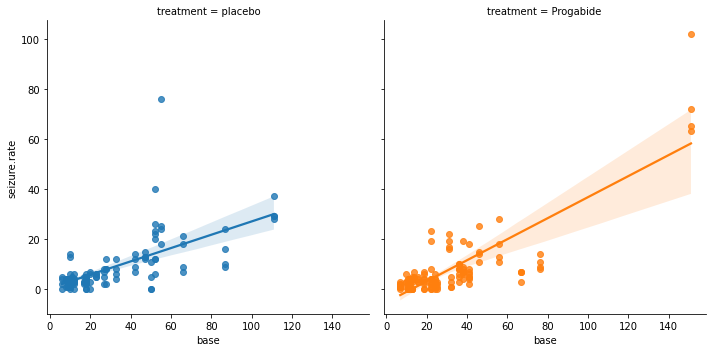

In [9]:
sns.lmplot(data=epilepsy,x='base',y='seizure.rate', hue="treatment", col='treatment')

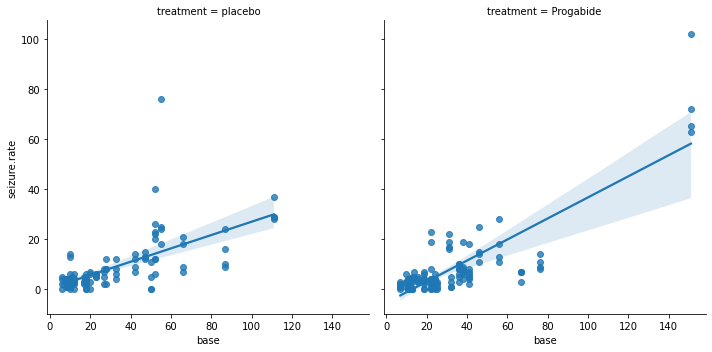

In [10]:
sns.lmplot(data=epilepsy,
           x="base",
           y="seizure.rate",
           col="treatment")

# CUSTOMIZE FURTHER A SEABORN PLOT

/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


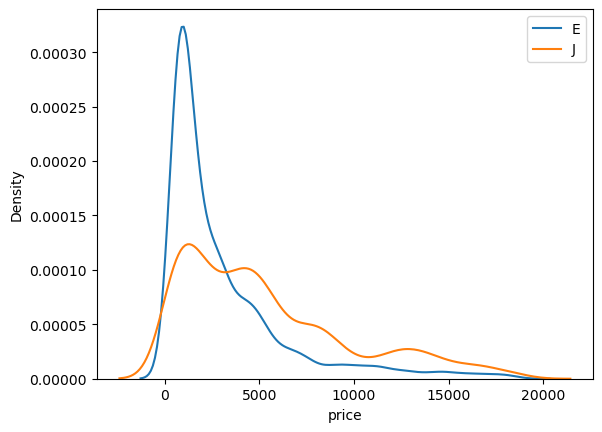

In [46]:
# PLOT DENSITY CURVES WITH SEABORN TO SHOW A POPULATION DISTRIBUTION

# if the default parameters of seaborn are too limited to allow the modifications you want to make, you can
# still use pyplot to modify it, because a seaborn plot is made with matplotlib.

diamonds = data('diamonds')

diamonds = diamonds[diamonds.color.isin(['E','J'])]

fig, axes = plt.subplots()

for c in diamonds.color.unique():   
    diamonds_subset = diamonds[diamonds.color == c]
    sns.distplot(diamonds_subset['price'], label=c, hist=False, ax = axes) # create a seaborn plot and assign
    # it to the axes object that you created earlier
    axes.set_xlabel('price') # now you can modify the seaborn plot like you would modify any matplotlib plot

axes.legend()

plt.show()

# HOW TO DISPLAY RELATIONSHIPS BETWEEN 2 CONTINUOUS VARIABLES

In [21]:

mpg = sns.load_dataset('mpg')
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


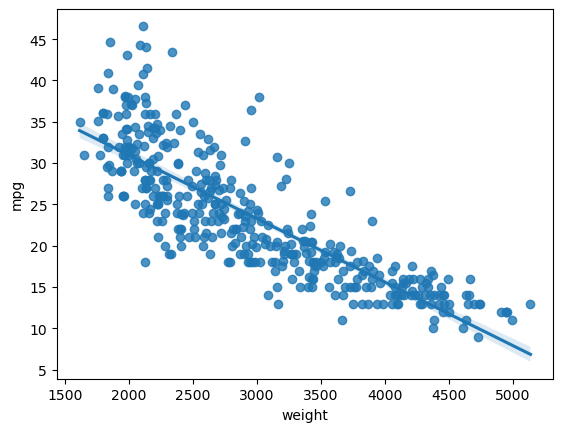

In [22]:
# regression plot
sns.regplot(data=mpg, y='mpg', x="weight",
        fit_reg = True) # make a simple scatter plot by just turning the regression line off

plt.show()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

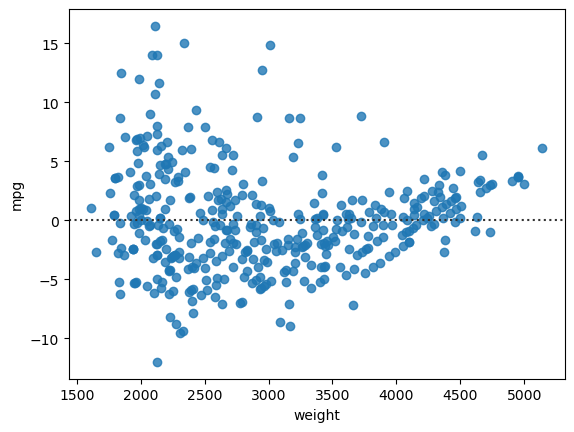

In [23]:
sns.residplot(data=mpg, y='mpg', x="weight")

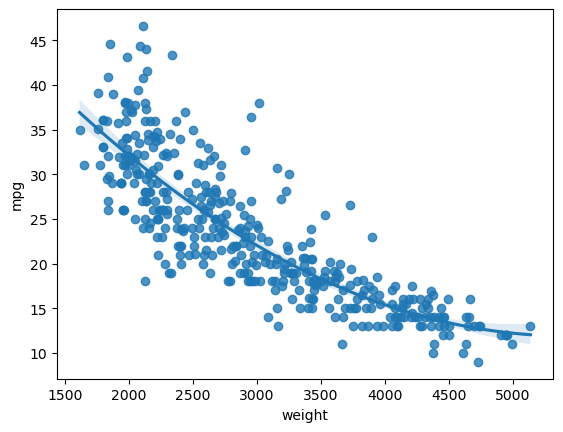

In [24]:
# regression plot
sns.regplot(data=mpg, y='mpg', x="weight",
        fit_reg = True, order=2) # make a simple scatter plot by just turning the regression line off

plt.show()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

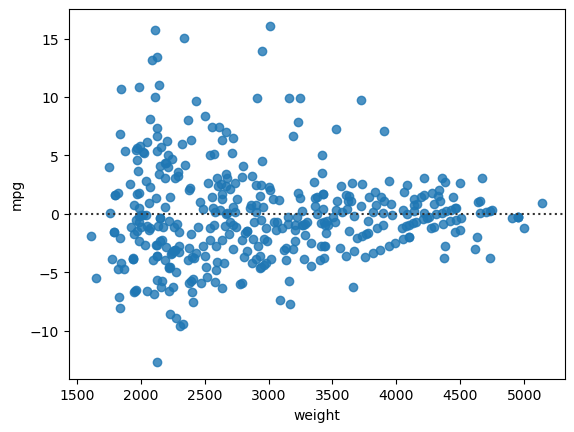

In [25]:
sns.residplot(data=mpg, y='mpg', x="weight", order=2)

# ANALIZE RESIDUAL PLOTS
[link_analize_resid_plots](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)

## Good residuals

Messy blob, no identifiable pattern
![good_resids >](good_resids.png)

## Bad residuals

Identifable patters.
For example, the residuals are:
- concentrated at the bottom
- in a funnel shape (they are smaller on one side on the axis and bigger on the other side)  
- in a v-shape
- concentrated near a side or corner
![bad_resids >](bad_resids.png)


# FACET GRIDS

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


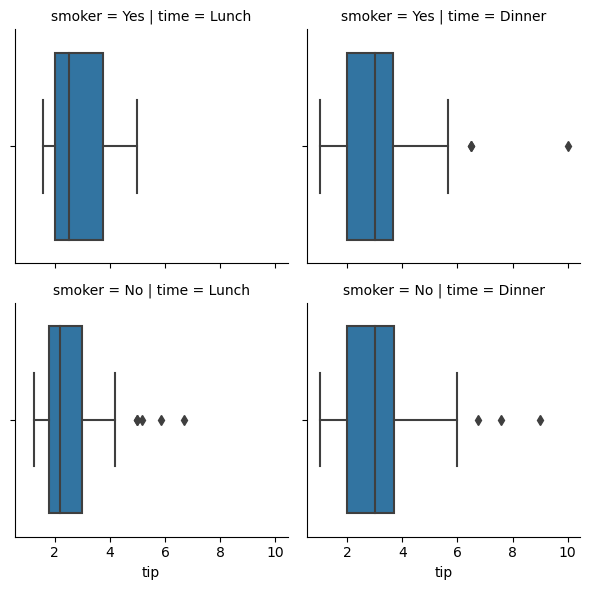

In [42]:
# either create explicitely a facetgrid and then fill it:

# separate the data
print(tips)

g = sns.FacetGrid(tips, col="time", row="smoker") # we'll create a grid called g.
# It will have 1 column for each value in the 
# column time (dinner or lunch) and one row for each value in the smoker column.
# 2 rows and 2 columns will give us space for 4 different plots

g.map(sns.boxplot,'tip') #then with the map() method of our object g, we will create boxplots in each of the 
# 4 spaces of our grid. 
# For each space, seaborn will create a small dataframe containing only the rows of our dataframe tips 
# where the values in the columns time and smoker match the criterion of our grid. For example,
# for the top left corner, it will create a subset of the tips dataframe where the customer is a smoker and the
# time is lunch time. 
# then it will use this subset to create a boxplot of the values in the tips column


# interesting additional parameters to map: row_order & col_order
# to control which value appears first in the column or row

# height and aspect allow you to set the height and width of the figure. because it's a facet grid so it has
# these possibilities

# UP TO 4 CATEGORICAL + 1 CONTINUOUS

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


/home/julien.massardier/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


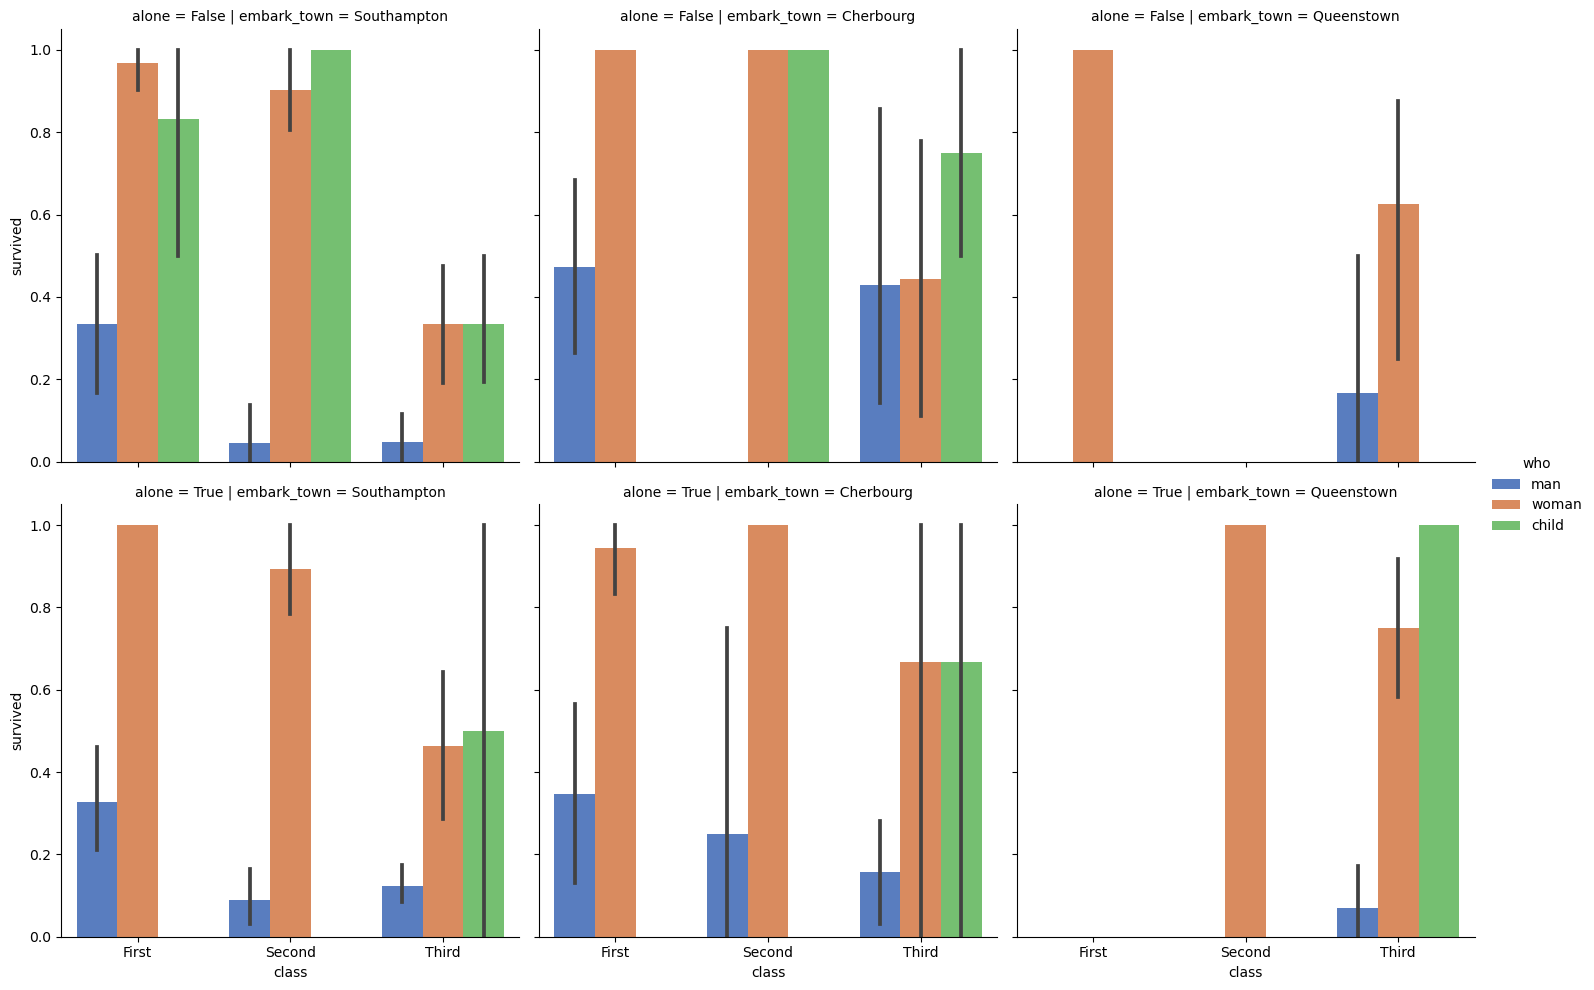

In [79]:
# Observe quickly the relationship between several variables at the same time with PairGrid
import seaborn as sns
titanic = sns.load_dataset("titanic")
print(titanic.head())

g = sns.factorplot(x = "class", y = "survived", hue="who", col='embark_town',row='alone',
data=titanic, kind="bar", palette="muted", legend=True)

# UP TO 4 CONTINUOUS VARIABLES

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


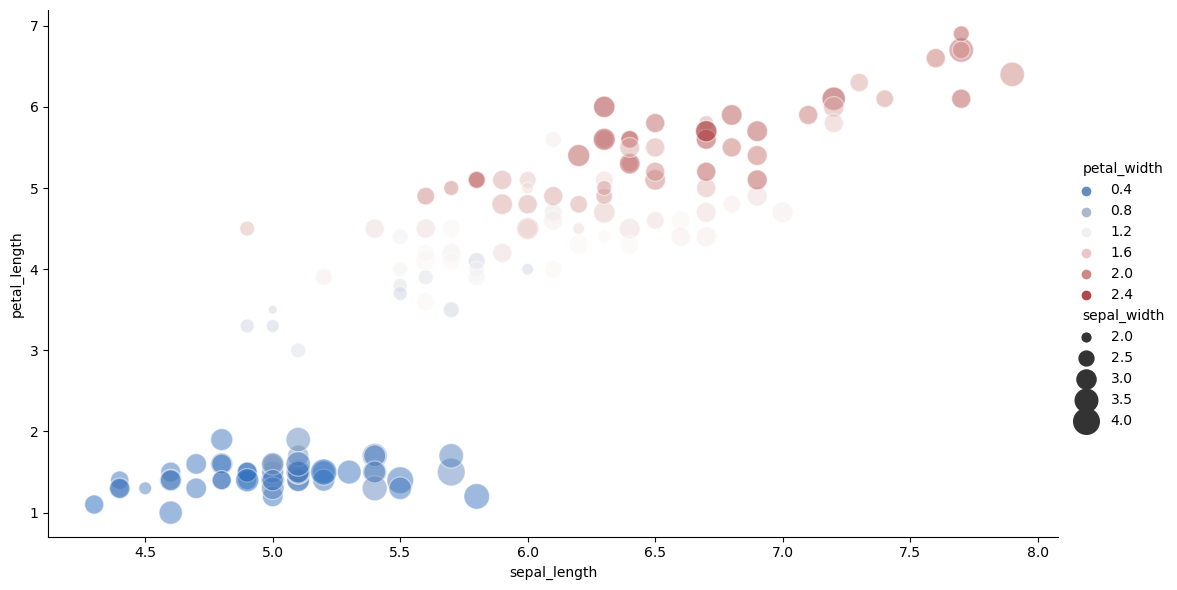

In [71]:
# SHOW MORE THAN 3 DIMENSIONS WITH SEABORN

import seaborn as sns
import matplotlib.pyplot as plt

iris =  sns.load_dataset("iris")

# the iris dataset has 5 dimensiond
print(iris.head())

# How do we plot as many as possible?
x_axis = 'sepal_length'
y_axis = 'petal_length'
sizes_column = 'sepal_width'
colors_column = 'petal_width'

my_regplot_object = sns.relplot(x=x_axis, y=y_axis, hue=colors_column, size=sizes_column,
            sizes=(40, 400), alpha=.5, palette = 'vlag',
            height=6, aspect = 1.8, data=iris)

# Why aren't we using fig, axes = plt.suplots() and ax = axes inside the relplot function?
# it's because the relplot function returns an object that contains a figure and axes, instead of an ax object.
# sns is full of little inconsistencies like that. 
# with displot instead, there is no problem with using fig, axes = plt.subplots()

fig = my_regplot_object.fig
axes = my_regplot_object.axes[0,0]

plt.show()

# UP TO 3 CONTINUOUS VARIABLES + 1 CATEGORICAL

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


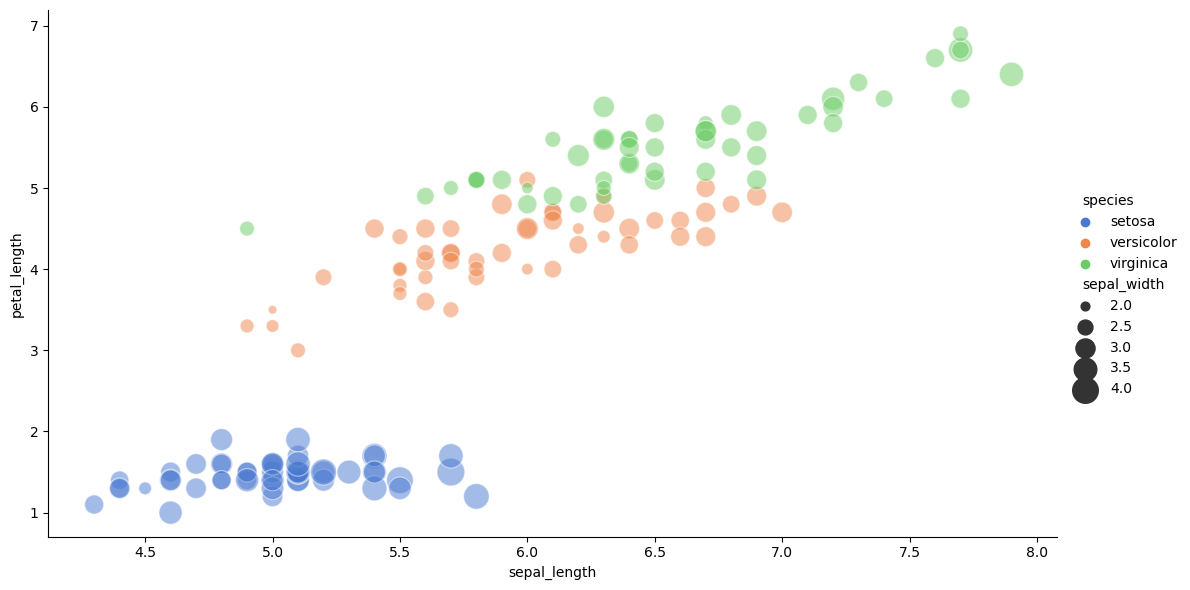

In [72]:
# SHOW MORE THAN 3 DIMENSIONS WITH SEABORN

import seaborn as sns
import matplotlib.pyplot as plt

iris =  sns.load_dataset("iris")

# the iris dataset has 5 dimensiond
print(iris.head())

# How do we plot as many as possible?
x_axis = 'sepal_length'
y_axis = 'petal_length'
sizes_column = 'sepal_width'
colors_column = 'species'

my_regplot_object = sns.relplot(x=x_axis, y=y_axis, hue=colors_column, size=sizes_column,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, aspect = 1.8, data=iris)

# Why aren't we using fig, axes = plt.suplots() and ax = axes inside the relplot function?
# it's because the relplot function returns an object that contains a figure and axes, instead of an ax object.
# sns is full of little inconsistencies like that. 
# with displot instead, there is no problem with using fig, axes = plt.subplots()

fig = my_regplot_object.fig
axes = my_regplot_object.axes[0,0]

plt.show()

# 1. HEATMAPS = 2 CATEGORICAL + 1 CONTINUOUS

In [55]:
# Show relationship between 2 categorical variables having multiple classes and 1 continuous variable: the heatmap

# a categorical variable is a variable that can take a limited number of values 
# In this example, the categorical variable is the months: 'Jan', 'Feb', etc. and the years.
# Year is, per se, a continuous variable as it can potentially take any value, but here we treat is as categorical.

# a categorical variable can be binary (take only 2 values like positive/negative for a diagnosis for example)

# first a pandas trick: pivot a dataframe
flights = sns.load_dataset("flights")
print("before pivoting:\n", flights.head())

flights_wide = pd.pivot_table(data = flights, index = "month", columns= ["year"], values = ['passengers'], aggfunc = 'sum')
print("after pivoting:\n", flights_wide.head())

before pivoting:
    year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
after pivoting:
       passengers                                                       
year        1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                  
Jan          112  115  145  171  196  204  242  284  315  340  360  417
Feb          118  126  150  180  196  188  233  277  301  318  342  391
Mar          132  141  178  193  236  235  267  317  356  362  406  419
Apr          129  135  163  181  235  227  269  313  348  348  396  461
May          121  125  172  183  229  234  270  318  355  363  420  472


<AxesSubplot:xlabel='None-year', ylabel='month'>

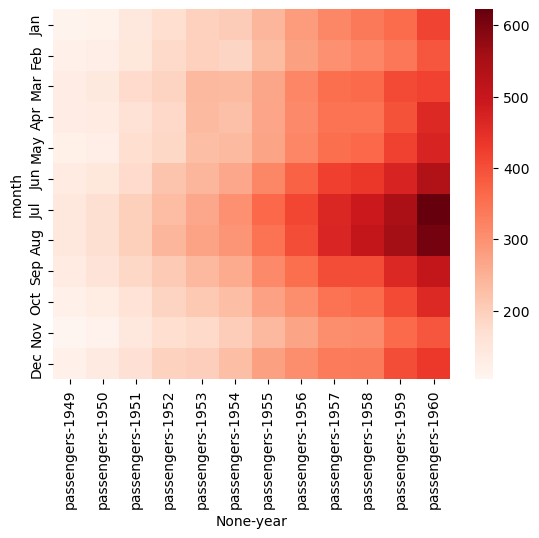

In [56]:
sns.heatmap(flights_wide, cmap='Reds')

<AxesSubplot:xlabel='None-year', ylabel='month'>

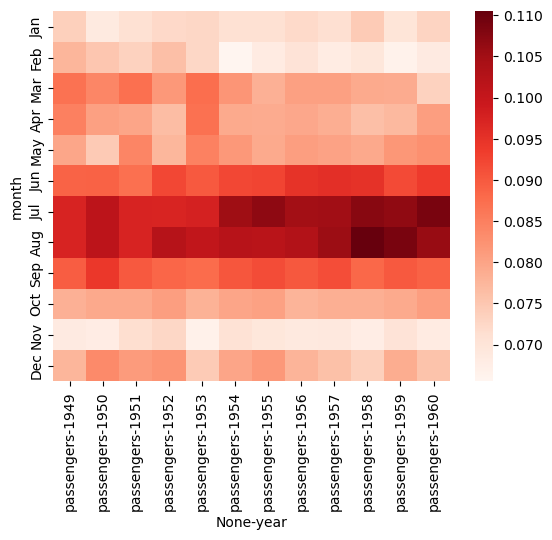

In [57]:
flights_wide_div = flights_wide.div(flights_wide.sum(axis=0), axis=1) #devide the values by the columns sum
# this way we see the concentration within each year. It is clear that July August were already big travel time
# in the past but this concentration is increasing further

sns.heatmap(flights_wide_div, cmap='Reds')

In [29]:
# visualize quick correlation among variables
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

[more on heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# MULTIPLE CONTINUOUS VARIABLES + 1 CATEGORICAL

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


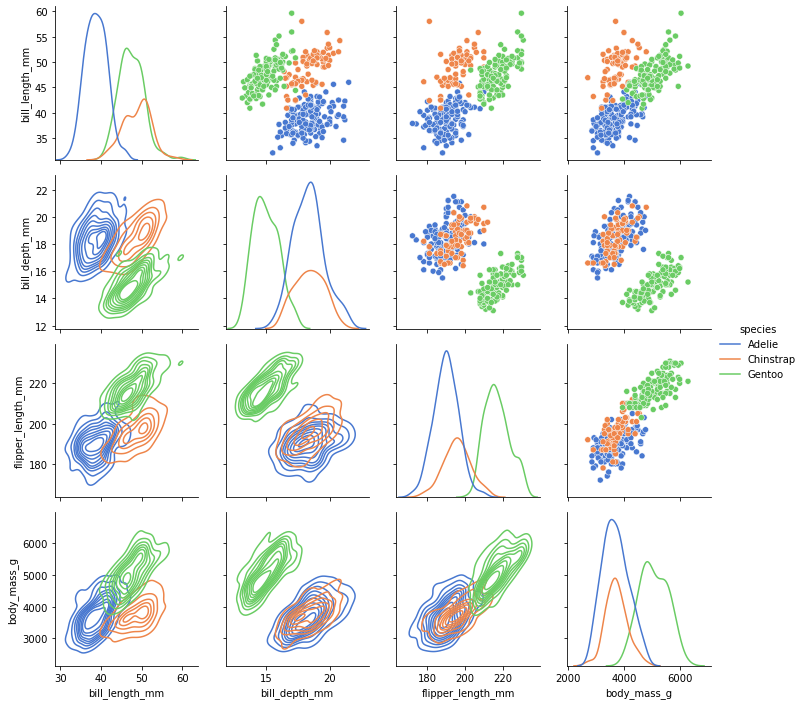

In [3]:
# Observe quickly the relationship between several variables at the same time with PairGrid
penguins = sns.load_dataset("penguins")
print(penguins.head())

g = sns.PairGrid(penguins, diag_sharey=False, hue = 'species', 
                 vars = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],palette="muted")
# diag_sharey just makes the plots in the diagonal have separate y axes
# the diagonal shows marginal distrubtions: ie: the distribution for a subset of data

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

# ANNEX - COLORS AND SEABORN

deep


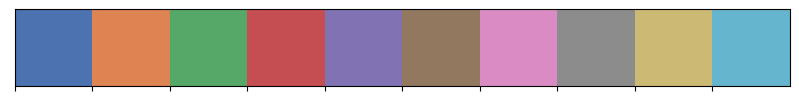

deep6


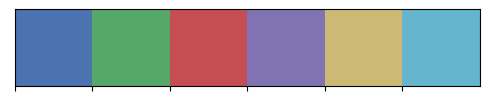

muted


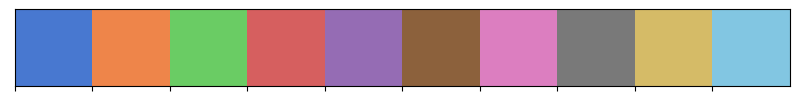

muted6


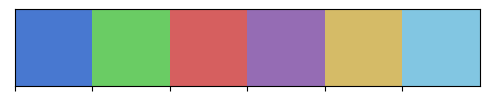

pastel


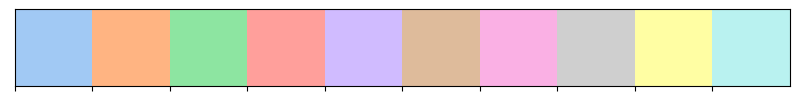

pastel6


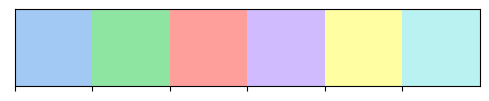

bright


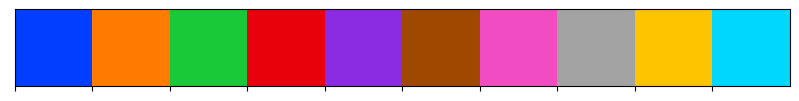

bright6


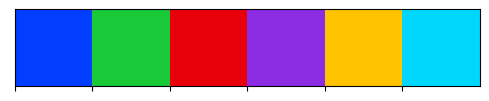

dark


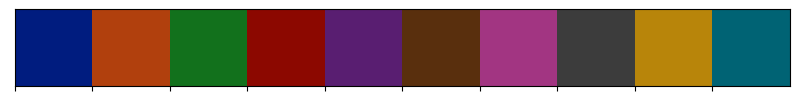

dark6


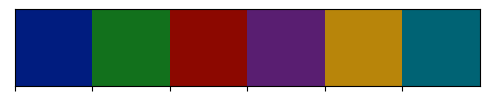

colorblind


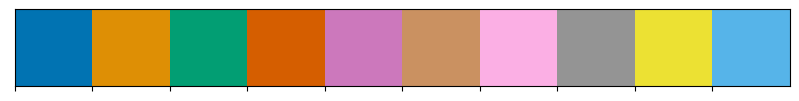

colorblind6


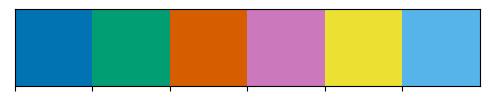

custom


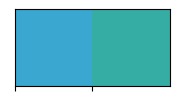

In [55]:
# pre defined palettes available:
for pal in sns.palettes.SEABORN_PALETTES:
    print(pal)
    sns.set_palette(pal) # this command sets the color palette
    sns.palplot(sns.color_palette()) # this one is here just to show what the colors look like
    plt.show()
    
# Set a custom color palette
print("custom")
sns.set_palette(["#39A7D0","#36ADA4"])
sns.palplot(sns.color_palette()) # this one is here just to show what the colors look like
plt.show()

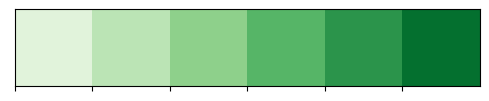

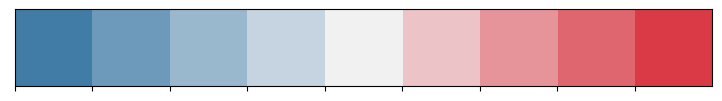

In [45]:
# create custom palettes with color gradients: 
sns.set_palette('Greens',6) # this command sets a palette of increasing greens. it's called a sequential palette
sns.palplot(sns.color_palette()) # this command just displays the colors
sns.set_palette(sns.diverging_palette(240, 10, n=9)) # this command sets a diverging palette from blue to red
sns.palplot(sns.diverging_palette(240, 10, n=9)) # this command just displays the colors

plt.style.use('default') # to reset the color palette

darkgrid


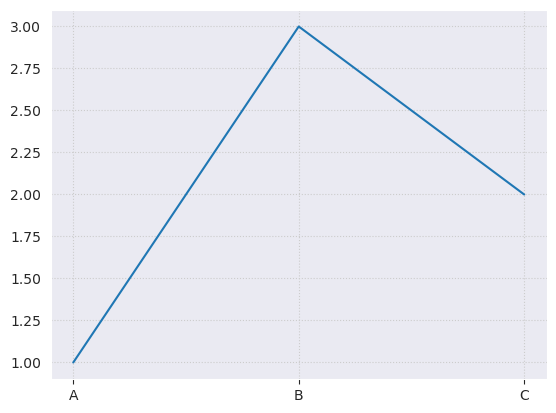

whitegrid


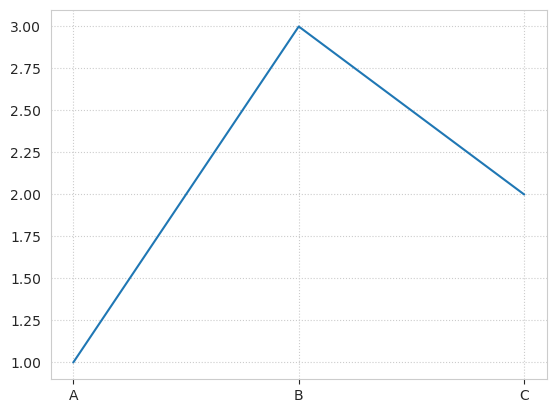

dark


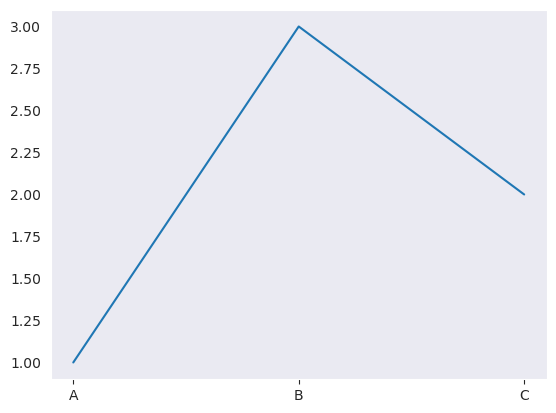

white


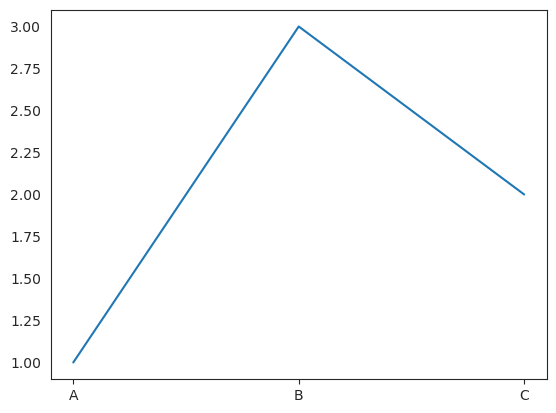

ticks


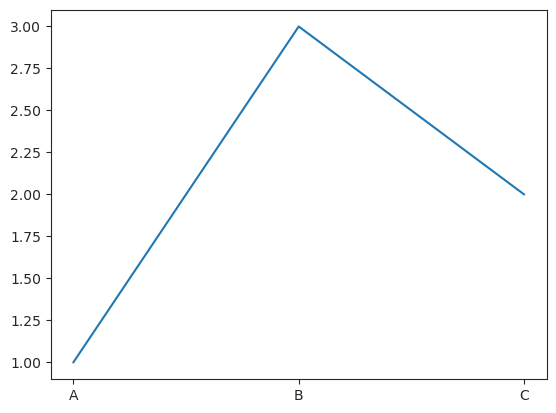

In [53]:
# set different styles
for style in ["darkgrid","whitegrid","dark","white","ticks"]:
    print(style)
    sns.set_style(style,
                  {"grid.color": ".8", #1 is transparent 
                               "grid.linestyle": ":",
                               "xtick.bottom":True,
                  'font.sans-serif':"Arial"})
    sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])
    plt.show()
plt.style.use('default') # to reset 

paper


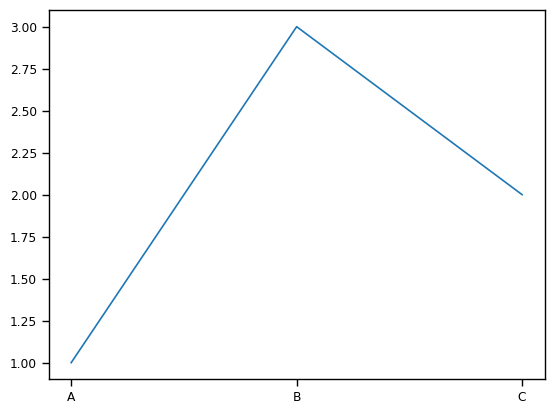

notebook


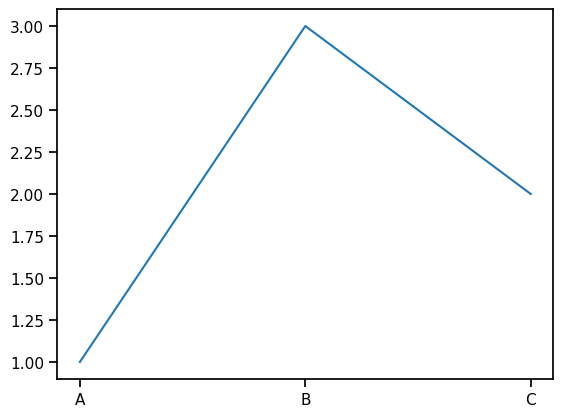

talk


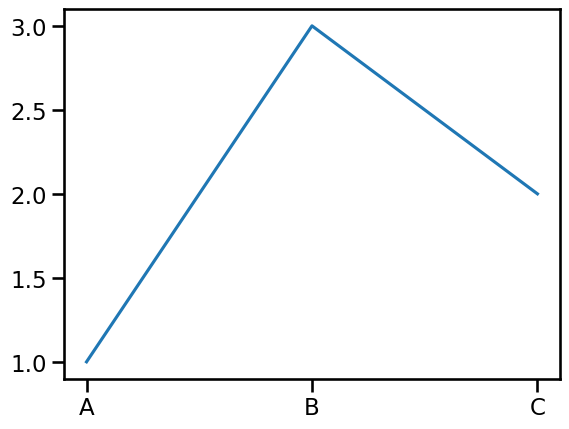

poster


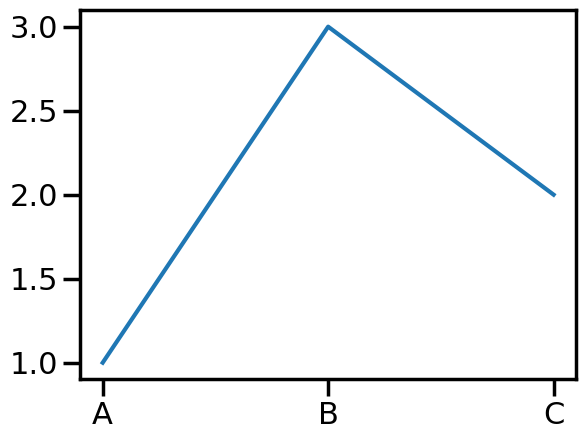

In [49]:
# Change the context to "poster" for better readability

for context in ["paper","notebook","talk","poster"]: 
    sns.set_context(context)
    print(context)

    sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])
    # Show plot
    plt.show()

plt.style.use('default') # to reset 

### PRIMITIVE PLOTS W/ SNS

scatter plot: each point is an individual observation

line plot: each line tracks the same thing over time

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

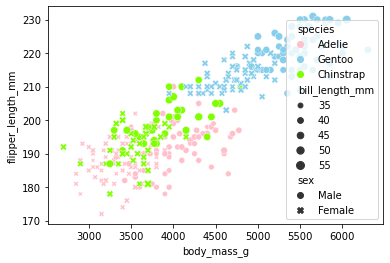

In [14]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", 
                data=penguins, 
                hue="species",
                style='sex',
                size='bill_length_mm',
                hue_order=['Adelie','Gentoo','Chinstrap'],#change order in legend
               palette={'Adelie':'pink','Gentoo':'skyblue','Chinstrap':'chartreuse'})# assign a color to each group


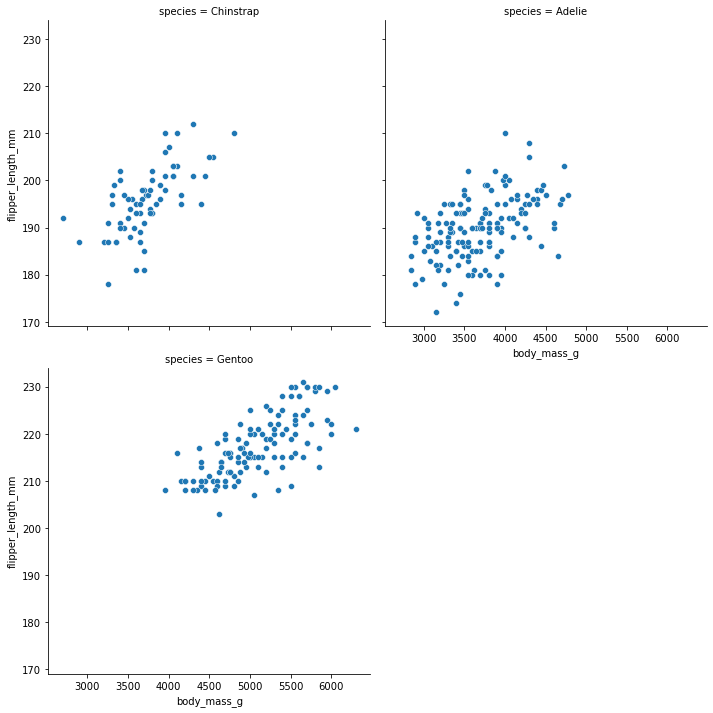

In [12]:
# sns.scatterplot() + facet grid
sns.relplot(x="body_mass_g", y="flipper_length_mm", #relplot stands for relationship plot
                data=penguins, 
            col='species', #facet for columns
           col_wrap=2, #maximum cols,
           col_order=["Chinstrap", "Adelie","Gentoo"], #force facet order
            kind="scatter") # type is line or scatter

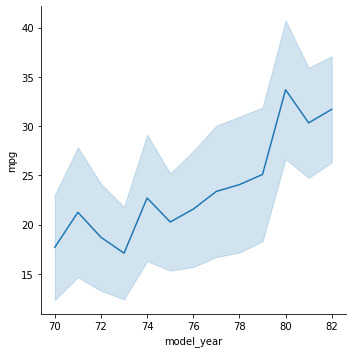

In [23]:
#sns.lineplot() + facet grid

mpg = sns.load_dataset("mpg")

sns.relplot(x="model_year", y="mpg",
            data=mpg, 
            kind="line", # use lineplot instead of scatterplot
            ci='sd') # ci is conf interval, default value gives SE of the mean

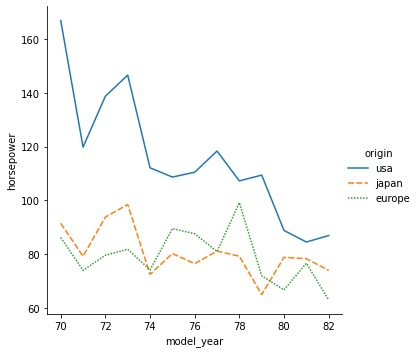

In [24]:
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None,hue='origin',style='origin')

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


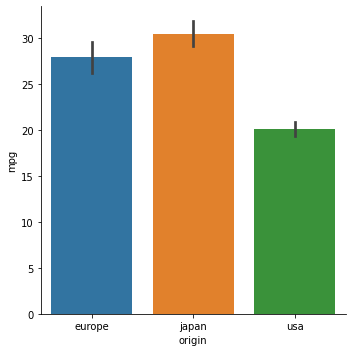

In [29]:
# CATEGORICAL PLOTS: populations statistics by subset of population

# avg mpg by origin with CI

print(mpg.head())
sns.catplot(x='origin', y="mpg", data= mpg, 
            kind='bar', 
            order=['europe','japan','usa'] #change order columns
           )

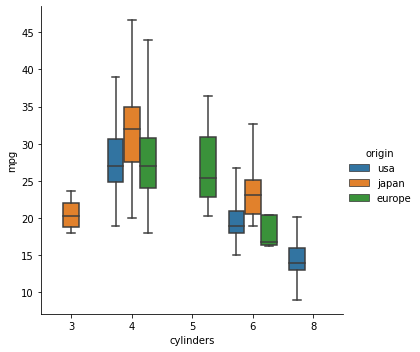

In [32]:
# boxplot, hide outliers
sns.catplot(data=mpg,x="cylinders",y="mpg", 
            hue='origin',
            kind='box', 
            sym="", #hide outliers
            whis=2 # default whiskers = 1.5 * IQR interange quantiles. 
            # you can use whis = [0,100] to cover the full range instead
           )


In [ ]:
sns.catplot(data=student_data,x="internet",y="G3", hue='location',kind='box', sym="")